In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

from pandas import read_csv, DataFrame
import pandas as pd
import sys

In [389]:
# Get the CSV data here and print head
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [390]:
dataframe = read_csv(filename, 

SyntaxError: unexpected EOF while parsing (3953013733.py, line 1)

In [ ]:
df.tail()

In [ ]:
#print summary
print ('Shape ------>', df.shape)
print ('Each Column and data type and its count', '\n')
print(df.info())

In [391]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [392]:
df.describe

<bound method NDFrame.describe of        Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


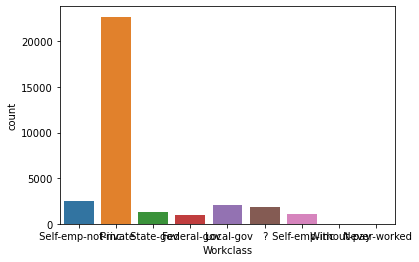

In [393]:
import seaborn as sns #checking for null
Workclass=sns.countplot(x="Workclass", data=df)
print(df["Workclass"].value_counts())
#AS U CAN SEE there is '?' in the data. We have to remove this

In [394]:
df.loc[df.Workclass==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


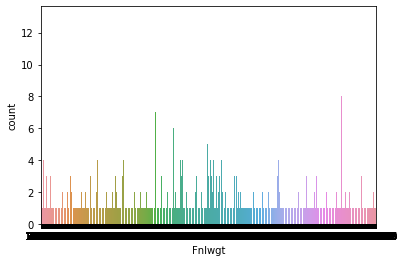

In [395]:
import seaborn as sns #checking for null
Fnlwgt=sns.countplot(x="Fnlwgt", data=df)
print(df["Fnlwgt"].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


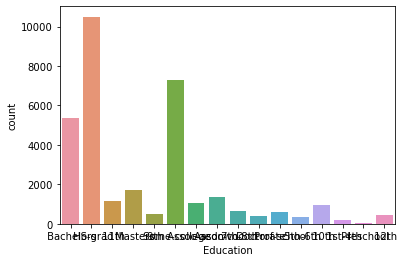

In [396]:
import seaborn as sns #checking for null
Education=sns.countplot(x="Education", data=df)
print(df["Education"].value_counts())

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


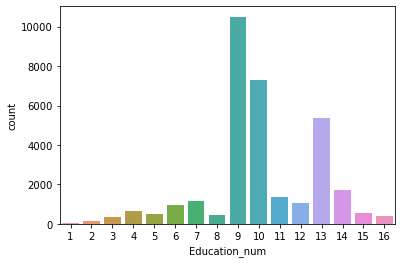

In [397]:
import seaborn as sns #checking for null
Education_num=sns.countplot(x="Education_num", data=df)
print(df["Education_num"].value_counts())

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


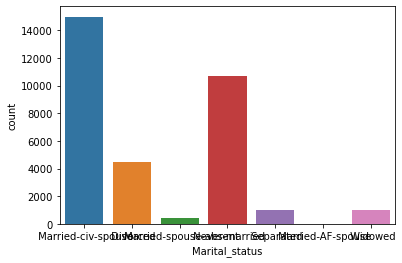

In [398]:
import seaborn as sns #checking for null
Marital_status=sns.countplot(x="Marital_status", data=df)
print(df["Marital_status"].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


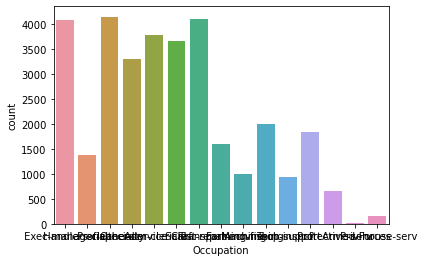

In [399]:
import seaborn as sns #checking for null
Occupation=sns.countplot(x="Occupation", data=df)
print(df["Occupation"].value_counts())

In [400]:
# since there is '?' in the data, we have to replace it
df.loc[df.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


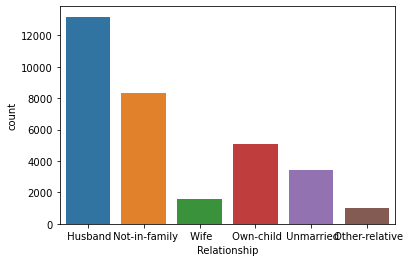

In [401]:
import seaborn as sns #checking for null
Education=sns.countplot(x="Relationship", data=df)
print(df["Relationship"].value_counts())

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


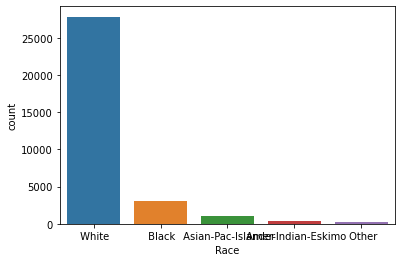

In [402]:
import seaborn as sns #checking for null
Race=sns.countplot(x="Race", data=df)
print(df["Race"].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


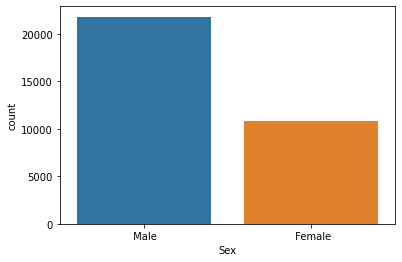

In [403]:
import seaborn as sns #checking for null
Sex=sns.countplot(x="Sex", data=df)
print(df["Sex"].value_counts())

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64


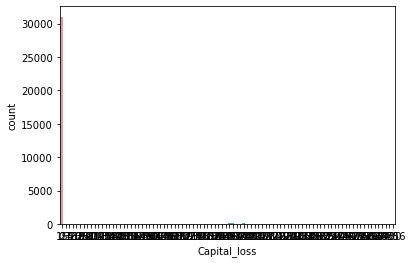

In [404]:
import seaborn as sns #checking for null
Capital_loss=sns.countplot(x="Capital_loss", data=df)
print(df["Capital_loss"].value_counts())

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64


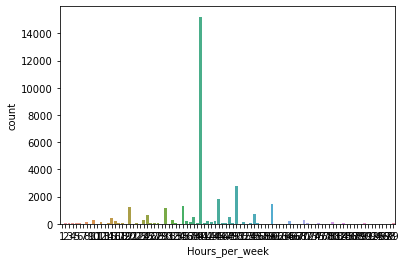

In [405]:
import seaborn as sns 
Hours_per_week=sns.countplot(x="Hours_per_week", data=df)
print(df["Hours_per_week"].value_counts())

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

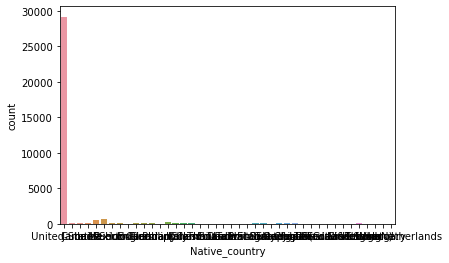

In [64]:
import seaborn as sns #checking for null
Native_country=sns.countplot(x="Native_country", data=df)
print(df["Native_country"].value_counts())

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64


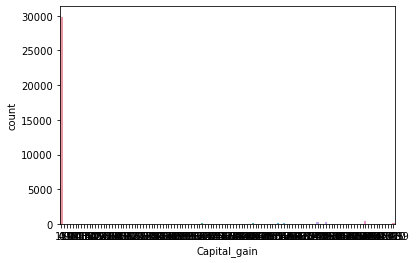

In [226]:
import seaborn as sns #checking for null
Capital_gain=sns.countplot(x="Capital_gain", data=df)
print(df["Capital_gain"].value_counts())

<=50K    24719
>50K      7841
Name: Income, dtype: int64


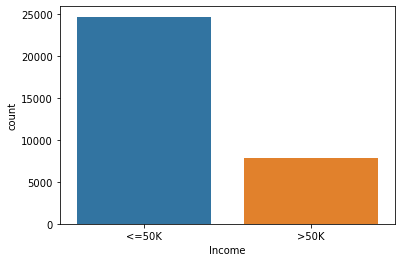

In [227]:
import seaborn as sns #checking for null
Capital_loss=sns.countplot(x="Income", data=df)
print(df["Income"].value_counts())
#this seems to be imbalanced

In [228]:
df.Workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [411]:
# discard spaces from entries
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in columns:
    df[column] = df[column].str.strip()

In [412]:
df= df.replace('?', np.NaN)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [413]:
df.Native_country.value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [414]:
df.Occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [416]:
df = new_df.dropna()

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [420]:
#ropping the education column as education_num column is already present
df = df.drop(['Education'], axis=1)

In [421]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

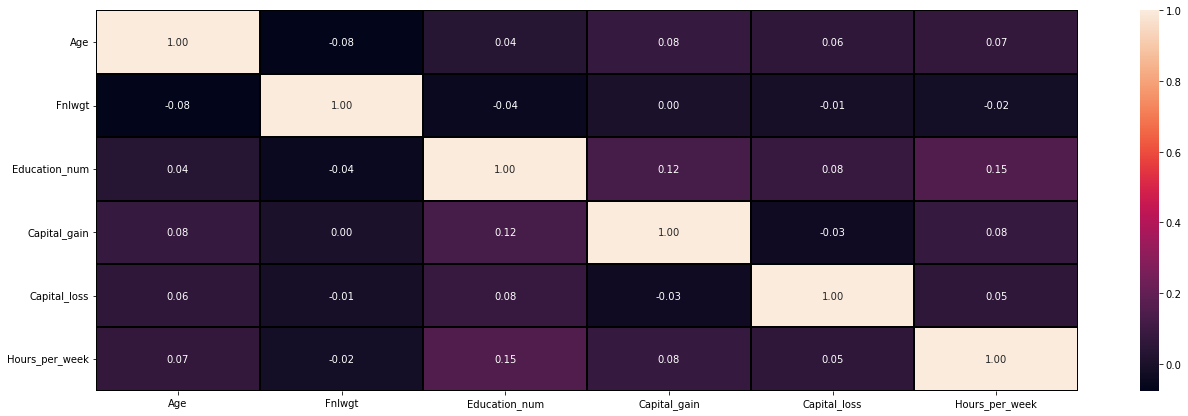

In [423]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [424]:
df.skew().sort_values(ascending=False)

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Age                0.558738
Hours_per_week     0.227636
Education_num     -0.311630
dtype: float64

In [425]:
from sklearn.preprocessing import LabelEncoder
for col in new_df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(new_df[col])

In [426]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education_num   32560 non-null  int64
 4   Marital_status  32560 non-null  int32
 5   Occupation      32560 non-null  int32
 6   Relationship    32560 non-null  int32
 7   Race            32560 non-null  int32
 8   Sex             32560 non-null  int32
 9   Capital_gain    32560 non-null  int64
 10  Capital_loss    32560 non-null  int64
 11  Hours_per_week  32560 non-null  int64
 12  Native_country  32560 non-null  int32
 13  Income          32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


<AxesSubplot:>

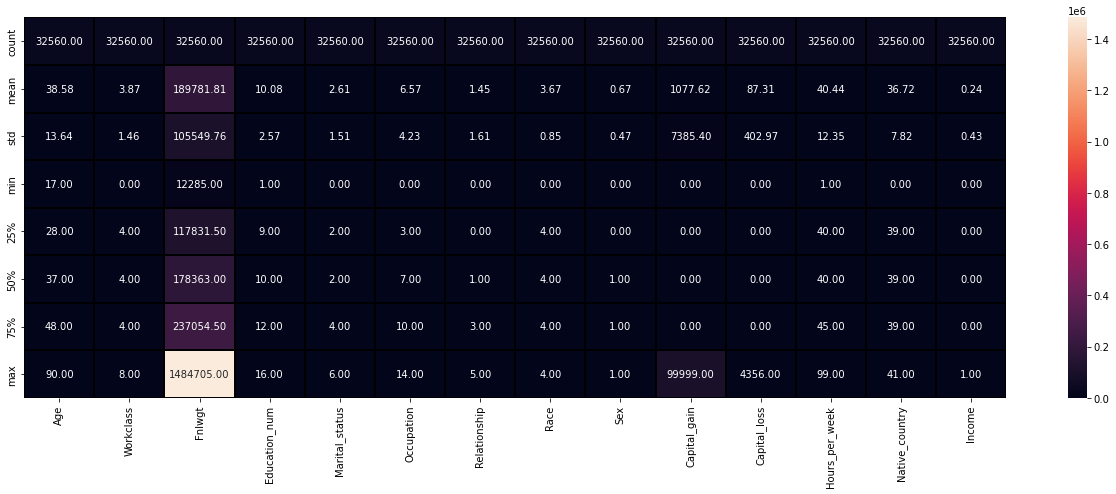

In [428]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [429]:
df.corr()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education_num,0.036527,0.052015,-0.043159,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.033828,0.000437,0.122627,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333


<AxesSubplot:>

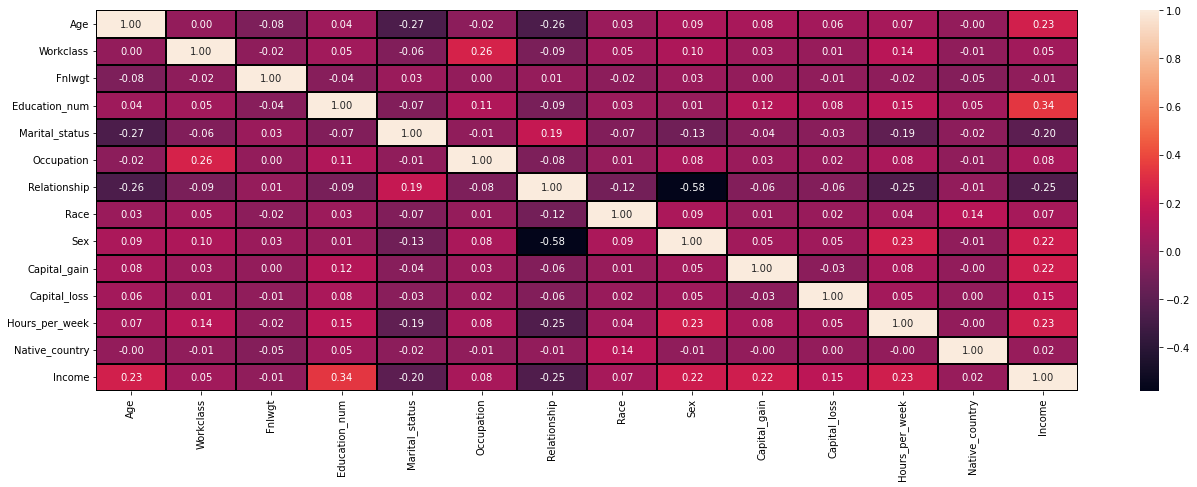

In [430]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

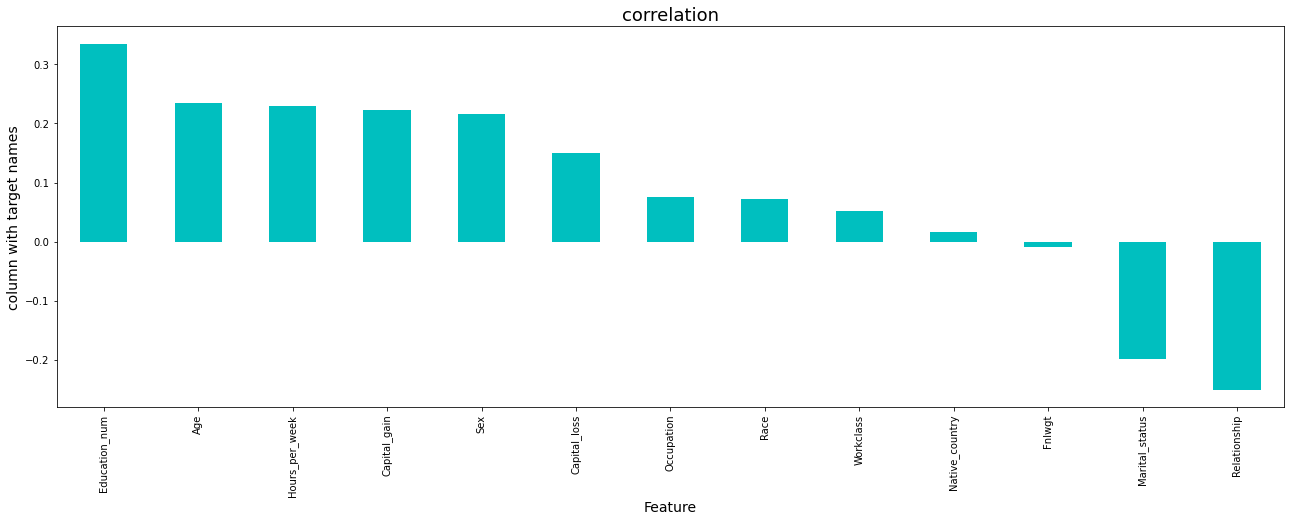

In [431]:
plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(["Income"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

In [432]:
df.skew().sort_values(ascending=False)

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Income             1.212383
Relationship       0.786784
Age                0.558738
Hours_per_week     0.227636
Occupation         0.114540
Marital_status    -0.013448
Education_num     -0.311630
Sex               -0.719244
Workclass         -0.752280
Race              -2.435332
Native_country    -3.658235
dtype: float64

In [433]:
corr_matrix=df.corr()
corr_matrix["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

<AxesSubplot:xlabel='Fnlwgt'>

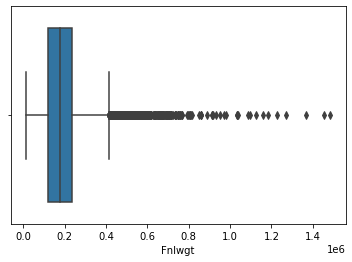

In [434]:
sns.boxplot(df["Fnlwgt"])

In [435]:
# Partioning the data
X = df.drop(['Income'],axis=1)
y = df['Income']

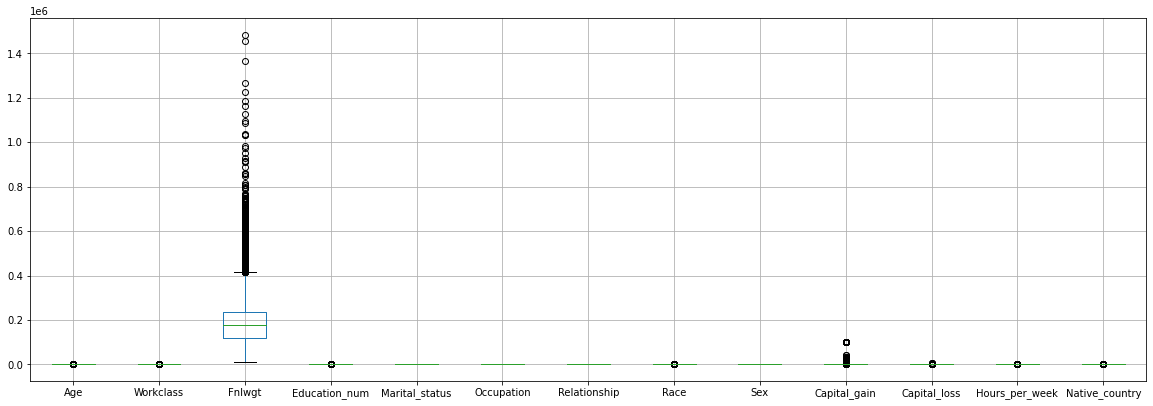

In [436]:
#Plotting boxplots for first 30 columns
X.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [437]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X=sc.fit_transform(X)
Scaled_X

array([[ 0.83709708,  1.46388339, -1.0087417 , ..., -0.21666301,
        -2.22212013,  0.29157343],
       [-0.04264043,  0.09012148,  0.24504633, ..., -0.21666301,
        -0.03542999,  0.29157343],
       [ 1.05703146,  0.09012148,  0.42576955, ..., -0.21666301,
        -0.03542999,  0.29157343],
       ...,
       [ 1.42358875,  0.09012148, -0.3588108 , ..., -0.21666301,
        -0.03542999,  0.29157343],
       [-1.21562378,  0.09012148,  0.11092744, ..., -0.21666301,
        -1.65520046,  0.29157343],
       [ 0.98372   ,  0.77700244,  0.92986178, ..., -0.21666301,
        -0.03542999,  0.29157343]])

In [438]:
from sklearn.model_selection import train_test_split
LR=LogisticRegression()

In [304]:
#Splitting the dataframe:
for i in range(0,400):
    X_train,X_test,y_train,y_test=train_test_split(Scaled_X,y,random_state=i,test_size=0.25)
    LR.fit(X_train, y_train)
    pred_train=LR.predict(X_train)
    pred_test=LR.predict(X_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state state",i,"The model performs very well")
        print("At random_state state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random_state state 7 The model performs very well
At random_state state:- 7
Training accuracy_score is:- 82.5
Testing accuracy_score is:- 82.5 


At random_state state 14 The model performs very well
At random_state state:- 14
Training accuracy_score is:- 82.6
Testing accuracy_score is:- 82.6 


At random_state state 26 The model performs very well
At random_state state:- 26
Training accuracy_score is:- 82.5
Testing accuracy_score is:- 82.5 


At random_state state 29 The model performs very well
At random_state state:- 29
Training accuracy_score is:- 82.5
Testing accuracy_score is:- 82.5 


At random_state state 31 The model performs very well
At random_state state:- 31
Training accuracy_score is:- 82.5
Testing accuracy_score is:- 82.5 


At random_state state 57 The model performs very well
At random_state state:- 57
Training accuracy_score is:- 82.6
Testing accuracy_score is:- 82.6 


At random_state state 71 The model performs very well
At random_state state:- 71
Training accura

In [305]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.25, random_state=14)

In [306]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier 
 
print("Model is created")

Model is created


In [307]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [308]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))


Lr classification score 0.7858312858312858
knn classification score 0.8327190827190827
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8605241605241605
svm classification score 0.795004095004095
gdboost classification score 0.8694922194922194


In [309]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)


In [310]:
#classification report
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)


In [313]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
#checking the roc_auc_score
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))


0.6165810932129578
0.6214718253876754
0.7471698033682446
0.7773718317595074
0.7670946702973711
0.5736206905528544
0.769443322555764


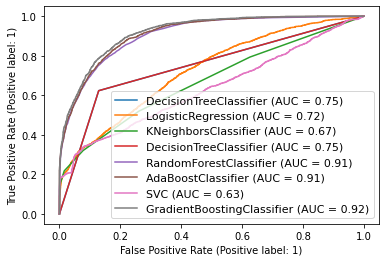

In [315]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

In [316]:
 CROSS VALIDATION
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True) #from above data
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [349]:
#GDB BOOST MODEL FOR CROSS VALIDATION
print("Mean of Cross validation score for gdboost model","=>",cross_val_score(gdboost,X,y,cv=6).mean())

Mean of Cross validation score for gdboost model => 0.8638208075901046


In [350]:
#Ada Boost
print("Mean of Cross validation score for Adaboost model","=>",cross_val_score(adb,X,y,cv=6).mean())

Mean of Cross validation score for Adaboost model => 0.8595826707565593


In [351]:
#Random classifier
print("Mean of Cross validation score for Random classifier","=>",cross_val_score(rf,X,y,cv=6).mean())

Mean of Cross validation score for Random classifier => 0.8596132059438149


In [318]:
gdboost.get_params().keys() 

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [320]:
parm_grid  = {'max_depth' : [3,4],
              'max_leaf_nodes' : [4],
              'learning_rate': [0.1],
              'random_state' : [4,5]}

In [327]:
gridsearch = GridSearchCV(gdboost, param_grid = parm_grid , cv=3)

In [328]:
#fit the model using given paramters
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'max_leaf_nodes': [4], 'random_state': [4, 5]})

In [329]:
gridsearch.best_params_
#printing the best parameters 

{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 4, 'random_state': 4}

In [332]:
gdboost_tuning=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,max_leaf_nodes=4,random_state=4)
#supplying best parameters to our model

In [333]:
#supplying best parameters to our model
gdboost_tuning.fit(X_train,y_train)

GradientBoostingClassifier(max_leaf_nodes=4, random_state=4)

In [343]:
#predicting the values using test data
gdboost_tuning_yprad = gdboost_tuning.predict(X_test)

In [344]:
#printing the classification report
gdboost_report = classification_report(y_test,gdboost_tuning_yprad)
print(" xgboost classification_report" ,'\n',gdboost_report)

 xgboost classification_report 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6183
           1       0.77      0.57      0.65      1957

    accuracy                           0.86      8140
   macro avg       0.82      0.76      0.78      8140
weighted avg       0.85      0.86      0.85      8140



In [345]:

# Check the accuracy
accuracy_score(y_test,gdboost_tuning_yprad) #it is still giving same value, no increase

0.8557739557739558

In [346]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'max_depth':range(4,8),
    'min_samples_split': range(2,8,2),
'learning_rate': np.arange(0.1,0.3) #it can go upto 1
}

In [347]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [348]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 4}

In [354]:
pred=grid.predict(X_train)

In [379]:
import pandas as pd
gbdt_clf=GradientBoostingClassifier(max_depth=4, min_samples_split=4, learning_rate=0.3)
gbdt_clf.fit(X_train, y_train)
pred=gbdt_clf.predict(X_train)
gbdt_clf_report=pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)} \n")

#***********************Test score******************************************
pred=gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, pred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



================Train Result======================
Accuracy Score: 89.66%
____________________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.911615     0.837860  0.896601      0.874737      0.893844
recall         0.956517     0.707852  0.896601      0.832184      0.896601
f1-score       0.933526     0.767388  0.896601      0.850457      0.893495
support    18536.000000  5884.000000  0.896601  24420.000000  24420.000000
____________________________________________________
Confusion Matrix: 
 [[17730   806]
 [ 1719  4165]] 


=================Test Result ==========================
Accuracy Score: 86.78%
____________________________________________________
CLASSIFICATION REPORT: 
                     0            1  accuracy    macro avg  weighted avg
precision     0.891701     0.771746  0.867813     0.831724      0.862862
recall        0.940158     0.639244  0.867813     0.789701      0

In [360]:
adb.get_params().keys() 

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [361]:
params = {'n_estimators': [47,50,60,70], 'learning_rate': [0.1, 0.25,0.30,0.40]}

In [366]:
Adagridsearch = GridSearchCV(, param_grid = params , cv=6)
Adagridsearch.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.25, 0.3, 0.4],
                         'n_estimators': [47, 50, 60, 70]})

In [370]:
ADpred=Adagridsearch.predict(X_train)

In [371]:
Adagridsearch.best_estimator_

AdaBoostClassifier(learning_rate=0.4, n_estimators=70)

In [378]:
adb_clf=AdaBoostClassifier(
    n_estimators=70, learning_rate=0.5)
adb_clf.fit(X_train, y_train)
ADpred=adb_clf.predict(X_train)
adb_clf_report=pd.DataFrame(
    classification_report(y_train, ADpred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)} \n")

#***********************Test score******************************************
ADpred=adb_clf.predict(X_test)
clf_report = pd.DataFrame(
    classification_report(y_test, ADpred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, ADpred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, ADpred)}\n")


================Train Result======================
Accuracy Score: 85.86%
____________________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.894934     0.811236  0.878829      0.853085      0.874767
recall         0.952147     0.647859  0.878829      0.800003      0.878829
f1-score       0.922655     0.720401  0.878829      0.821528      0.873922
support    18536.000000  5884.000000  0.878829  24420.000000  24420.000000
____________________________________________________
Confusion Matrix: 
 [[17613   923]
 [ 2529  3355]] 


=================Test Result ==========================
Accuracy Score: 85.54%
____________________________________________________
CLASSIFICATION REPORT: 
                     0            1  accuracy    macro avg  weighted avg
precision     0.876052     0.762803  0.855405     0.819427      0.848825
recall        0.943070     0.578436  0.855405     0.760753      0